In [ ]:
# Business Case: Yulu - Hypothesis Testing

## About Yulu

Yulu is India’s leading ***micro-mobility service provider***, which ***offers unique vehicles for the daily commute***. Starting off as a ***mission to eliminate traffic congestion in India***, Yulu provides the safest commute solution through a ***user-friendly mobile app to enable shared, solo and sustainable commuting.***

***Yulu zones*** are located at all the appropriate locations (including ***metro stations, bus stands, office spaces, residential areas, corporate offices, etc***) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want ***to understand the factors affecting the demand for these shared electric cycles in the Indian market***.

## Problem Statement

The company wants to know:
 - **Which variables are significant in predicting the demand for shared electric cycles in the Indian market?**
 
 - **How well those variables describe the electric cycle demands**

#### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy
from scipy import stats

#### Reading the dataset

In [2]:
df = pd.read_csv(r"E:\1.SCALER\Classes\BusinessCase Studies\5.Business Case Yulu - Hypothesis Testing\yulu_data.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### Shape of the dataset

In [3]:
df.shape

(10886, 12)

#### Columns in the Dataset 

In [4]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#### Basic information about the values present in the dataset 

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,19-12-2012 23:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


**Column Profiling**:
 -	**datetime**: datetime
 -	**season**: season (1: spring, 2: summer, 3: fall, 4: winter)
 -	**holiday**: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
 -	**workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.
 -	**weather**:
  -	1: Clear, Few clouds, partly cloudy, partly cloudy
  -	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  -	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  -	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 -	**temp**: temperature in Celsius
 -	**atemp**: feeling temperature in Celsius
 -	**humidity**: humidity
 -	**windspeed**: wind speed
 -	**casual**: count of casual users
 -	**registered**: count of registered users
 -	**count**: count of total rental bikes including both casual and registered

#### Is there any null value in the dataset ?

In [7]:
np.any(df.isna())

False

#### Is there any duplicated values in the dataset ?

In [8]:
np.any(df.duplicated())

False

#### Datatype of the columns

In [9]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

##### Converting the datatype of datetime column from object to datetime

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

#### What is the time period for which the data is given ?

In [11]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [12]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [13]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

In [14]:
#df['day'] = df['datetime'].dt.day_name()

In [15]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### Basic Information about the Dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


 - The dataframe requires a memory usage of about 1.1+ MB.
 - Though the memory usage is small but can we still decrease the memory usage ?

In [17]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

### Optimizing Memory Usage of the Dataframe

##### Updating dtype of season column

In [18]:
print('Memory usage of season column : ', df['season'].memory_usage()) 
# Since the dtype of season column is object, we can convert the dtype to category to save memory
df['season'] = df['season'].astype('category')
print('Updated Memory usage of season column : ', df['season'].memory_usage())

Memory usage of season column :  87216
Updated Memory usage of season column :  11218


##### Updating dtype of holiday column

In [19]:
print('Max value entry in holiday column : ', df['holiday'].max())         
print('Memory usage of holiday column : ', df['holiday'].memory_usage()) 
# Since the maximum entry in holiday column is 1 and the dtype is int64, we can convert the dtype to category to save memory
df['holiday'] = df['holiday'].astype('category')
print('Updated Memory usage of holiday column : ', df['holiday'].memory_usage())

Max value entry in holiday column :  1
Memory usage of holiday column :  87216
Updated Memory usage of holiday column :  11138


#### Updating dtype of workingday column 

In [20]:
print('Max value entry in workingday column : ', df['workingday'].max())         
print('Memory usage of workingday column : ', df['workingday'].memory_usage()) 
# Since the maximum entry in workingday column is 1 and the dtype is int64, we can convert the dtype to category to save memory
df['workingday'] = df['workingday'].astype('category')
print('Updated Memory usage of workingday column : ', df['workingday'].memory_usage())

Max value entry in workingday column :  1
Memory usage of workingday column :  87216
Updated Memory usage of workingday column :  11138


#### Updating dtype of weather column

In [21]:
print('Max value entry in weather column : ', df['weather'].max())         
print('Memory usage of weather column : ', df['weather'].memory_usage()) 
# Since the maximum entry in weather column is 4 and the dtype is int64, we can convert the dtype to category to save memory
df['weather'] = df['weather'].astype('category')
print('Updated Memory usage of weather column : ', df['weather'].memory_usage())

Max value entry in weather column :  4
Memory usage of weather column :  87216
Updated Memory usage of weather column :  11218


#### Updating dtype of temp column

In [22]:
print('Max value entry in temp column : ', df['temp'].max())         
print('Memory usage of temp column : ', df['temp'].memory_usage()) 
# Since the maximum entry in temp column is 41.0 and the dtype is float64, we can convert the dtype to float32 to save memory
df['temp'] = df['temp'].astype('float32')
print('Updated Memory usage of temp column : ', df['temp'].memory_usage())

Max value entry in temp column :  41.0
Memory usage of temp column :  87216
Updated Memory usage of temp column :  43672


#### Updating dtype of atemp column 

In [23]:
print('Max value entry in atemp column : ', df['atemp'].max())         
print('Memory usage of atemp column : ', df['atemp'].memory_usage()) 
# Since the maximum entry in atemp column is 45.455 and the dtype is float64, we can convert the dtype to float32 to save memory
df['atemp'] = df['atemp'].astype('float32')
print('Updated Memory usage of atemp column : ', df['atemp'].memory_usage())

Max value entry in atemp column :  45.455
Memory usage of atemp column :  87216
Updated Memory usage of atemp column :  43672


#### Updating dtype of humidity column

In [24]:
print('Max value entry in humidity column : ', df['humidity'].max())         
print('Memory usage of humidity column : ', df['temp'].memory_usage()) 
# Since the maximum entry in humidity column is 100 and the dtype is int64, we can convert the dtype to int8 to save memory
df['humidity'] = df['humidity'].astype('int8')
print('Updated Memory usage of humidity column : ', df['humidity'].memory_usage())

Max value entry in humidity column :  100
Memory usage of humidity column :  43672
Updated Memory usage of humidity column :  11014


#### Updating dtype of windspeed column

In [25]:
print('Max value entry in windspeed column : ', df['windspeed'].max())         
print('Memory usage of windspeed column : ', df['windspeed'].memory_usage()) 
# Since the maximum entry in windspeed column is 56.9969 and the dtype is float64, we can convert the dtype to float32 to save memory
df['windspeed'] = df['windspeed'].astype('float32')
print('Updated Memory usage of windspeed column : ', df['windspeed'].memory_usage())

Max value entry in windspeed column :  56.9969
Memory usage of windspeed column :  87216
Updated Memory usage of windspeed column :  43672


#### Updating dtype of casual column

In [26]:
print('Max value entry in casual column : ', df['casual'].max())         
print('Memory usage of casual column : ', df['casual'].memory_usage()) 
# Since the maximum entry in casual column is 367 and the dtype is int64, we can convert the dtype to int16 to save memory
df['casual'] = df['casual'].astype('int16')
print('Updated Memory usage of casual column : ', df['casual'].memory_usage())

Max value entry in casual column :  367
Memory usage of casual column :  87216
Updated Memory usage of casual column :  21900


#### Updating dtype of registered column

In [27]:
print('Max value entry in registered column : ', df['registered'].max())         
print('Memory usage of registered column : ', df['registered'].memory_usage()) 
# Since the maximum entry in registered column is 886 and the dtype is int64, we can convert the dtype to int16 to save memory
df['registered'] = df['registered'].astype('int16')
print('Updated Memory usage of registered column : ', df['registered'].memory_usage())

Max value entry in registered column :  886
Memory usage of registered column :  87216
Updated Memory usage of registered column :  21900


#### Updating dtype of count column 

In [28]:
print('Max value entry in count column : ', df['count'].max())         
print('Memory usage of count column : ', df['count'].memory_usage()) 
# Since the maximum entry in count column is 977 and the dtype is int64, we can convert the dtype to int16 to save memory
df['count'] = df['count'].astype('int16')
print('Updated Memory usage of count column : ', df['count'].memory_usage())

Max value entry in count column :  977
Memory usage of count column :  87216
Updated Memory usage of count column :  21900


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int8          
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int16         
 10  registered  10886 non-null  int16         
 11  count       10886 non-null  int16         
dtypes: category(4), datetime64[ns](1), float32(3), int16(3), int8(1)
memory usage: 330.3 KB


##### Earlier the dataset was using  1.1+ MB of memory but now it has  been reduced to 415.2+ KB. Around 63.17 % reduction in the memory usage.

#### Basic Description of the dataset 

In [30]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.230862,23.655085,61.886460,12.799396,36.021955,155.552177,191.574132
std,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000


 - These statistics provide insights into the central tendency, spread, and range of the numerical features in the dataset.

In [31]:
np.round(df['season'].value_counts(normalize = True) * 100, 2)

winter    25.11
fall      25.11
summer    25.11
spring    24.67
Name: season, dtype: float64

In [32]:
np.round(df['holiday'].value_counts(normalize = True) * 100, 2)

0    97.14
1     2.86
Name: holiday, dtype: float64

In [33]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)

1    68.09
0    31.91
Name: workingday, dtype: float64

In [34]:
np.round(df['weather'].value_counts(normalize = True) * 100, 2)

1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

[]

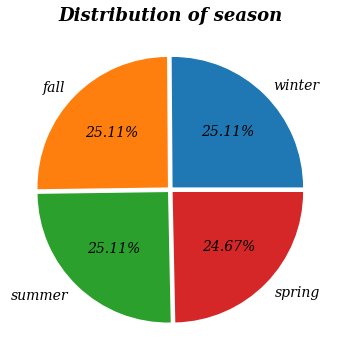

In [35]:
# The below code generates a visually appealing pie chart to showcase the 
    # distribution of seasons in the dataset

plt.figure(figsize = (6, 6))      # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of season', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_season['season'], 
        explode = [0.025, 0.025, 0.025, 0.025], 
        labels = df_season.index,
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()     # displaying the plot

[]

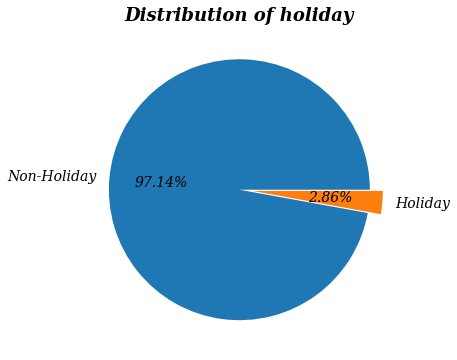

In [36]:
# The below code generates a visually appealing pie chart to showcase the 
    # distribution of holiday in the dataset

plt.figure(figsize = (6, 6))     # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of holiday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_holiday = np.round(df['holiday'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_holiday['holiday'], 
        explode = [0, 0.1], 
        labels = ['Non-Holiday', 'Holiday'], 
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()        # displaying the plot

[]

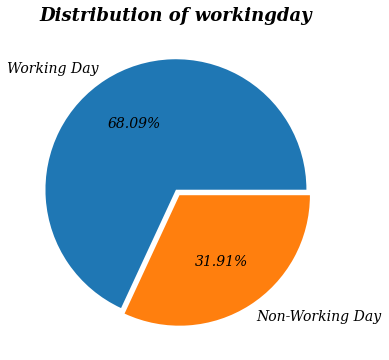

In [37]:
# The below code generates a visually appealing pie chart to showcase the 
    # distribution of workingday in the dataset

plt.figure(figsize = (6, 6))    # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of workingday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_workingday = np.round(df['workingday'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_workingday['workingday'], 
        explode = [0, 0.05], 
        labels = ['Working Day', 'Non-Working Day'], 
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()         # displaying the plot

[]

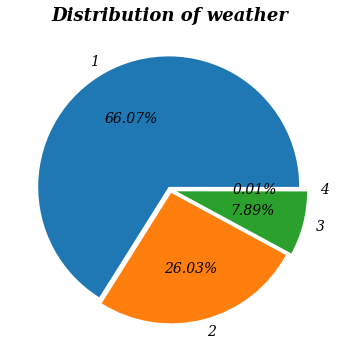

In [38]:
# The below code generates a visually appealing pie chart to showcase the 
    # distribution of weather in the dataset

plt.figure(figsize = (6, 6))     # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of weather', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})

df_weather = np.round(df['weather'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_weather['weather'], 
        explode = [0.025, 0.025, 0.05, 0.05], 
        labels = df_weather.index, 
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()        # displaying the plot

In [39]:
# detecting missing values in the dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [40]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [41]:
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,winter,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.230862,23.655085,61.886460,12.799396,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000


- There are no missing values present in the dataset.
- **humidity**, **casual**, **registered** and **count** attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

In [42]:
# minimum datetime and maximum datetime
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [43]:
# number of unique values in each categorical columns
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value        
holiday    0       10575
           1         311
season     fall     2733
           spring   2686
           summer   2733
           winter   2734
weather    1        7192
           2        2834
           3         859
           4           1
workingday 0        3474
           1        7412

###  Univariate Analysis

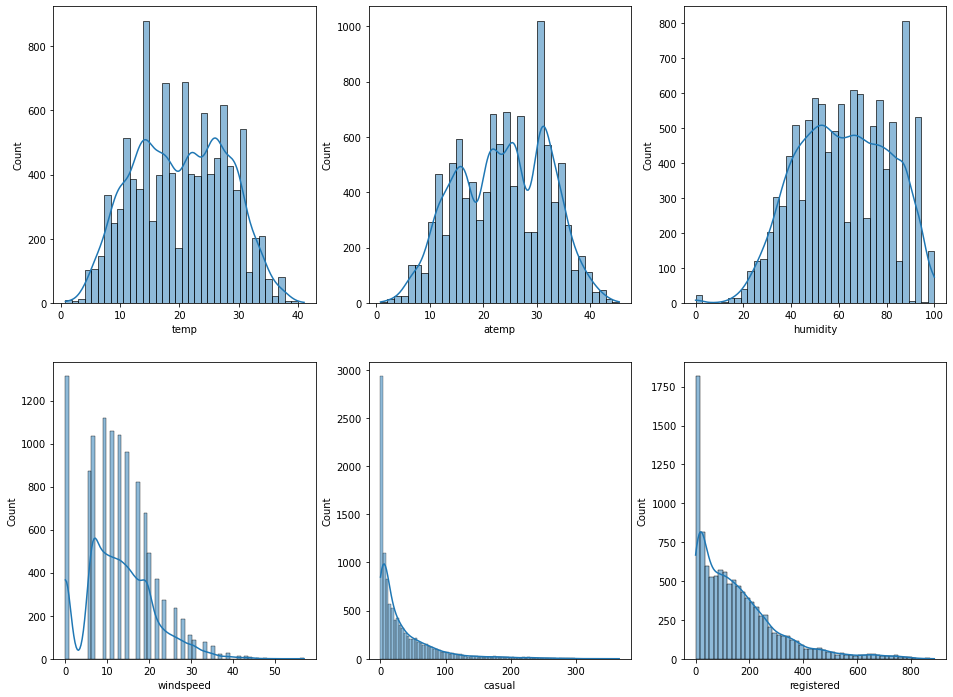

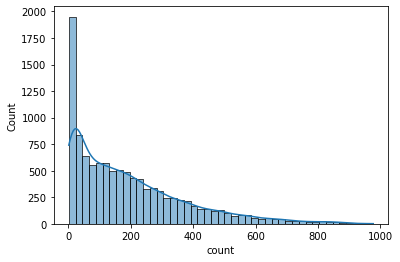

In [44]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
        
plt.show()
sns.histplot(df[num_cols[-1]], kde=True) 
plt.show()

- **casual**, **registered** and **count** somewhat looks like **Log Normal Distrinution**
- **temp**, **atemp** and **humidity** looks like they follows the **Normal Distribution**
- **windspeed** follows the **binomial distribution**

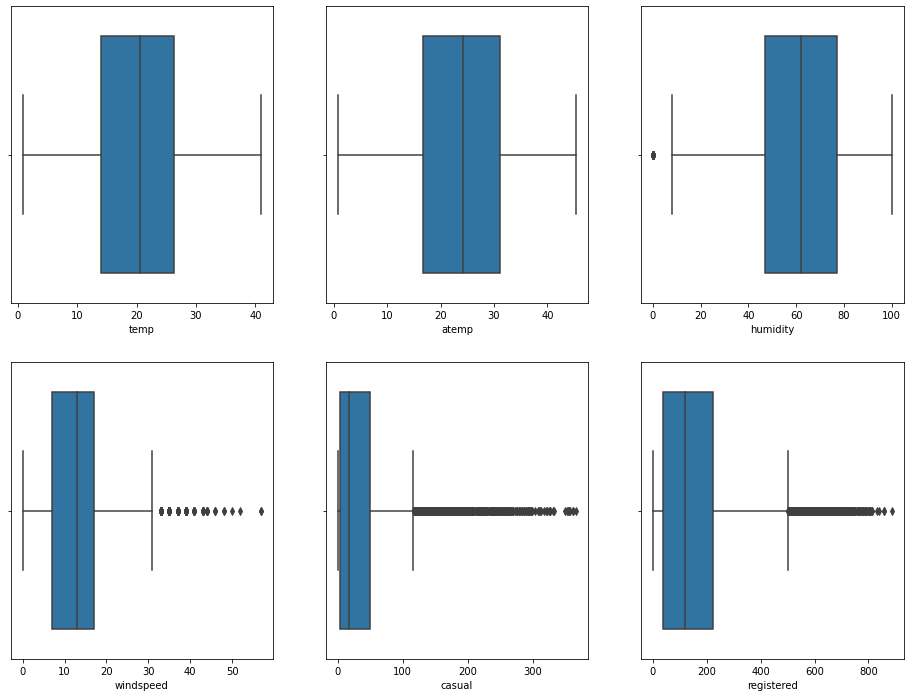

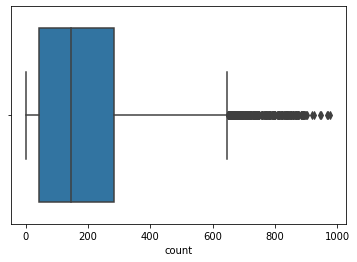

In [45]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=df[num_cols[-1]]) 
plt.show()

- There is no outlier in the **temp** column.
- There are few outliers present in **humidity** column.
- There are many outliers present in each of the columns : **windspeed**, **casual**, **registered**, **count**.

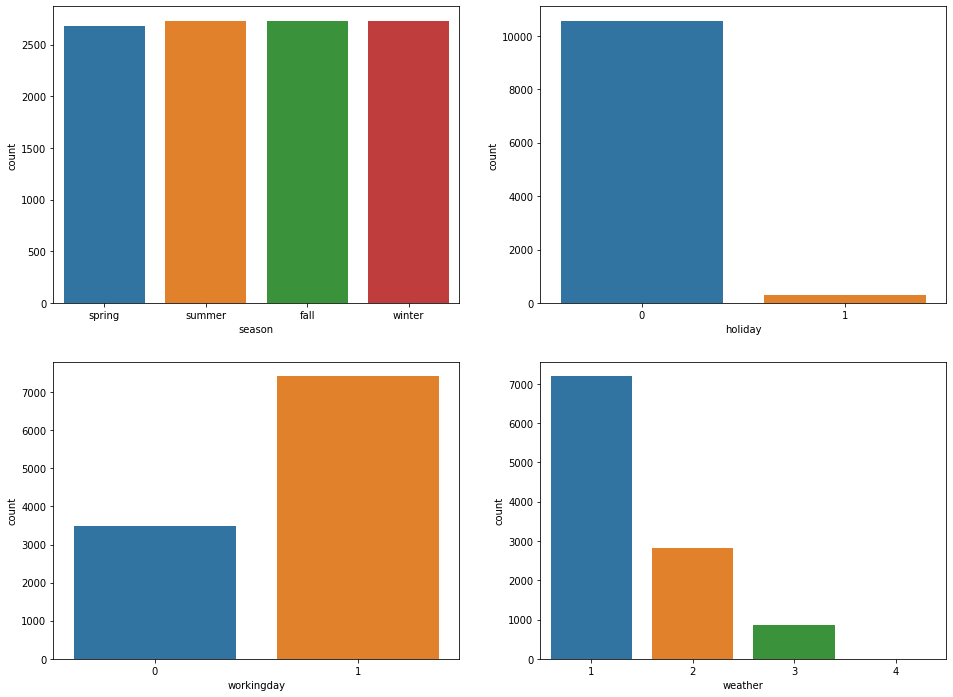

In [46]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()

Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

### Bi-variate Analysis

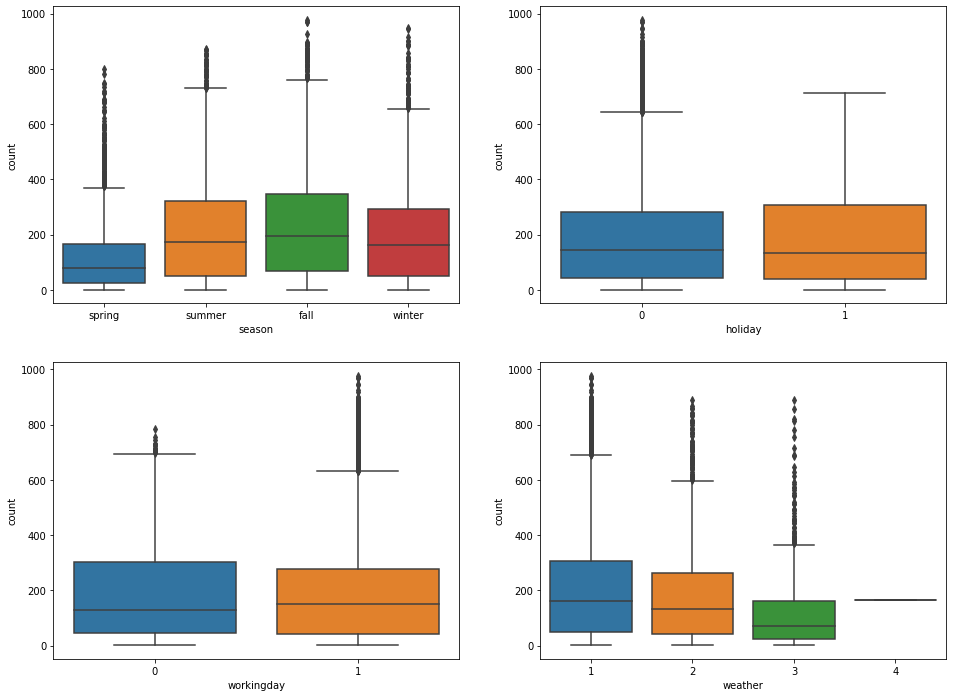

In [47]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

- The hourly count of total rental bikes is higher in the **fall** season, followed by the **summer** and **winter** seasons.     It is generally low in the **spring** season.
- Whenever its a **holiday** more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is **rain, thunderstorm, snow or fog**, there were less bikes were rented. The hourly count of total rental     bikes is higher in the **clear and cloudy** weather, followed by the **misty** weather and **rainy** weather. There are very   few records for extreme weather conditions.

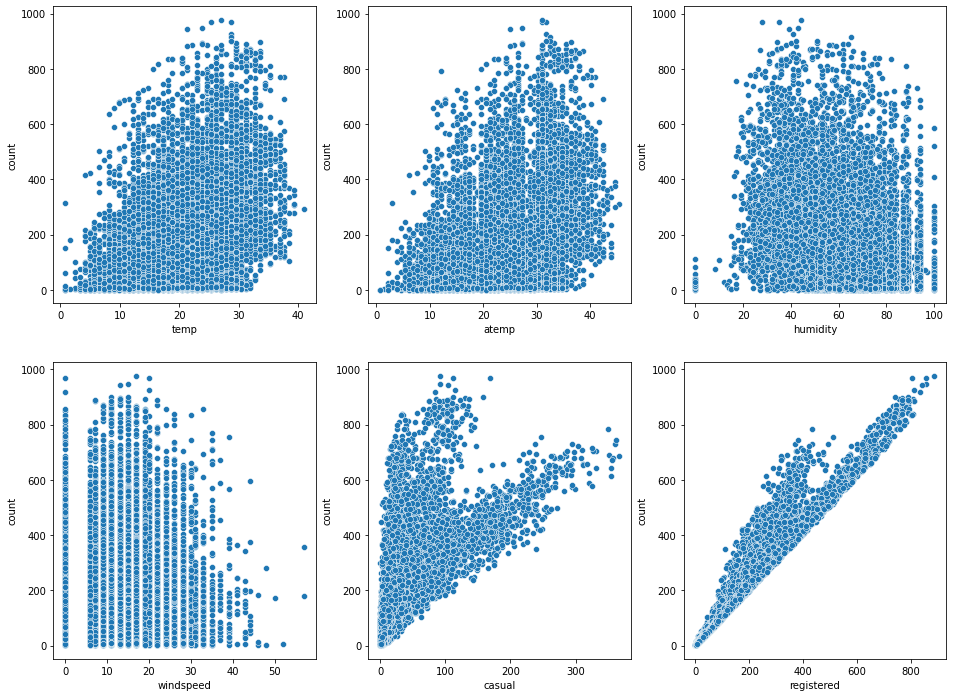

In [48]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.

In [49]:
# understanding the correlation between count and numerical variables 
df.corr()['count']

temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

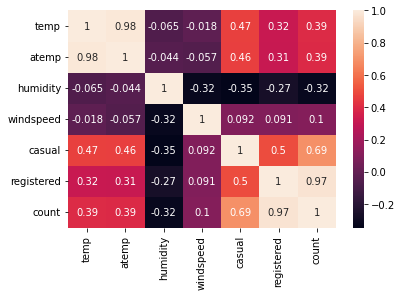

In [50]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Hypothesis Testing - 1

- **Null Hypothesis (H0):** Weather is independent of the season


- **Alternate Hypothesis (H1):** Weather is not independent of the season


- **Significance level (alpha): 0.05**

We will use **chi-square test** to test hypyothesis defined above.

In [51]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summer,1801,708,224,0
winter,1702,807,225,0


In [52]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [53]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent\
          on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent          on the season.


## Hypothesis Testing - 2

**Null Hypothesis:** Working day has no effect on the number of cycles being rented.


**Alternate Hypothesis:** Working day has effect on the number of cycles being rented.


**Significance level (alpha): 0.05**


We will use the **2-Sample T-Test** to test the hypothess defined above




In [54]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. 
If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [55]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

**Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.**

## Hypothesis Testing - 3

**Null Hypothesis:** Number of cycles rented is similar in different weather and season.


**Alternate Hypothesis:** Number of cycles rented is not similar in different weather and season.


**Significance level (alpha): 0.05**


Here, we will use the **ANOVA** to test the hypothess defined above

In [56]:
# defining the data groups for the ANOVA

gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

# gp5 = df[df['season']==1]['count'].values
# gp6 = df[df['season']==2]['count'].values
# gp7 = df[df['season']==3]['count'].values
# gp8 = df[df['season']==4]['count'].values

gp5 = df[df['season']=='spring']['count'].values
gp6 = df[df['season']=='summer']['count'].values
gp7 = df[df['season']=='fall']['count'].values
gp8 = df[df['season']=='winter']['count'].values

# conduct the one-way anova
stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

**Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions**

### Insights
   - In **summer** and **fall** seasons more bikes are rented as compared to other seasons.
   
   - Whenever its a **holiday** more bikes are rented.
   
   - It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
   
   - Whenever there is **rain, thunderstorm, snow or fog**, there were less bikes were rented.
   
   
   - Whenever the humidity is less than 20, number of bikes rented is very very low.,
   
   - Whenever the temperature is less than 10, number of bikes rented is less.
   
   - Whenever the windspeed is greater than 35, number of bikes rented is less.

### Recommendations
   - In **summer** and **fall** seasons the company should have more bikes in stock to be rented. Because the demand in these        seasons is higher as compared to other seasons.
   
   
   - With a significance level of 0.05, **workingday** has no effect on the number of bikes being rented.
   
   
   - In very low humid days, company should have less bikes in the stock to be rented.
   
   
   - Whenever temprature is less than 10 or in very cold days, company should have less bikes.
   
   
   - Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.